In [8]:
strs=["Thor is eating Pizza","Loki is Traveling"]

In [9]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

def ReturnArray(lst):
    v = CountVectorizer(ngram_range=(1, 1))
    v.fit_transform(lst)
    return v.transform(lst).toarray()

In [10]:
str_preprocessed = [preprocess(i) for i in strs]

In [11]:
vectorized_data = ReturnArray(str_preprocessed)

In [12]:
similarity_matrix = cosine_similarity(vectorized_data)
similarity_score = round(similarity_matrix[0, 1], 1)
difference_score = round(1 - similarity_score, 1)

In [13]:
print(f"Similarity Score: {similarity_score}")
print(f"Difference Score: {difference_score}")

Similarity Score: 0.3
Difference Score: 0.7


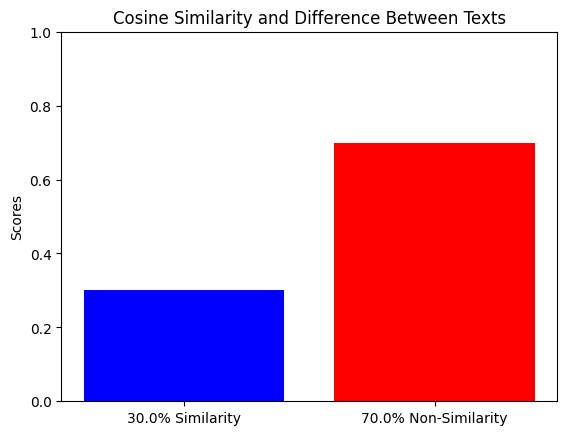

In [14]:
labels = [f'{similarity_score*100}% Similarity', f'{difference_score*100}% Non-Similarity']
scores = [similarity_score, difference_score]
colors = ['blue', 'red']

plt.bar(labels, scores, color=colors)
plt.ylim(0, 1)
plt.ylabel('Scores')
plt.title('Cosine Similarity and Difference Between Texts')
plt.show()